# Question 1 - A

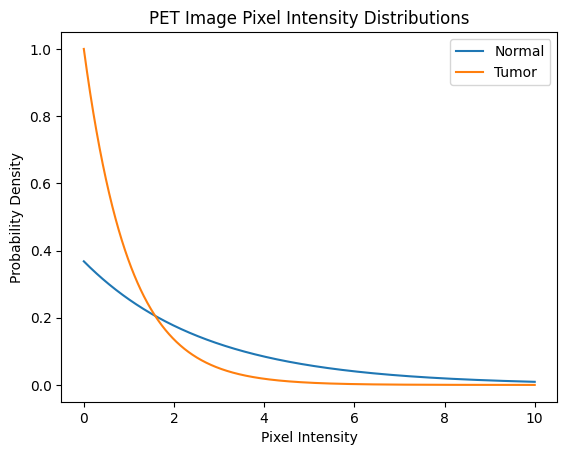

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the distributions
def normal_distribution(x):
    beta_n = np.exp(1)
    return (1/beta_n) * np.exp(-x/beta_n) if x >= 0 else 0

def tumor_distribution(x):
    beta_t = 1
    return (1/beta_t) * np.exp(-x/beta_t) if x >= 0 else 0

# Generate x values
x_values = np.linspace(0, 10, 1000)

# Plot the distributions
plt.plot(x_values, [normal_distribution(x) for x in x_values], label='Normal')
plt.plot(x_values, [tumor_distribution(x) for x in x_values], label='Tumor')
plt.xlabel('Pixel Intensity')
plt.ylabel('Probability Density')
plt.legend()
plt.title('PET Image Pixel Intensity Distributions')
plt.show()


# Question 1 - B
Since the prior probabilities of the classes are the same, the minimum error classification rule is to classify a pixel as tumor if p(tumor|x)>p(normal|x) and as normal otherwise. The vertical line represents the intersection of the two classes and where the two classes are distinguishable.


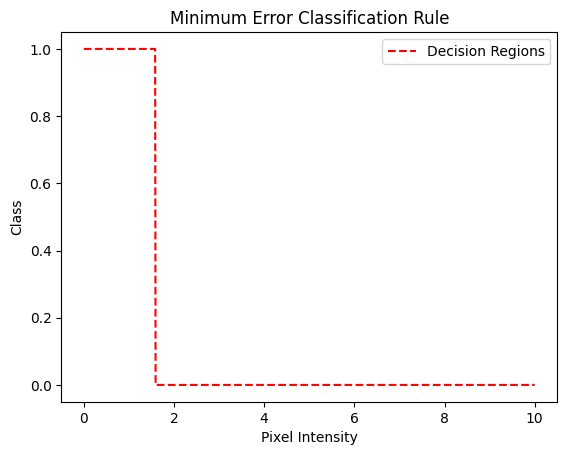

In [2]:
# Classification rule
def minimum_error_classification_rule(x):
    return 1 if tumor_distribution(x) > normal_distribution(x) else 0

# Plot decision regions
decision_regions = [minimum_error_classification_rule(x) for x in x_values]
plt.plot(x_values, decision_regions, label='Decision Regions', color='r', linestyle='--')
plt.xlabel('Pixel Intensity')
plt.ylabel('Class')
plt.legend()
plt.title('Minimum Error Classification Rule')
plt.show()


# Question 1 - C
Since the prior probability of normal tissue decreased to 1.64 times that of tumor tissue, the intersection point along the x-axis is shifted to the left, hence narrowing our minimum rejection region. Essentially we have a wider range of proper classification.

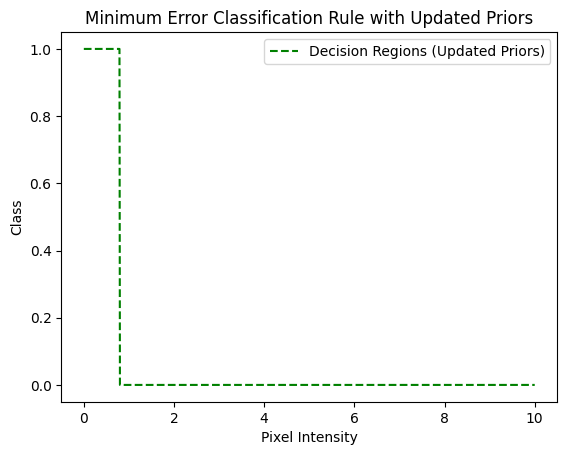

In [3]:
# Assuming the prior probability of normal tissue is 1.64 times that of tumor tissue
prior_normal = 1.64 # Beta n
prior_tumor = 1 # Beta t

# Updated classification rule
def minimum_error_classification_rule_updated_priors(x):
    posterior_normal = normal_distribution(x) * prior_normal
    posterior_tumor = tumor_distribution(x) * prior_tumor
    return 1 if posterior_tumor > posterior_normal else 0

# Plot updated decision regions
decision_regions_updated_priors = [minimum_error_classification_rule_updated_priors(x) for x in x_values]
plt.plot(x_values, decision_regions_updated_priors, label='Decision Regions (Updated Priors)', color='g', linestyle='--')
plt.xlabel('Pixel Intensity')
plt.ylabel('Class')
plt.legend()
plt.title('Minimum Error Classification Rule with Updated Priors')
plt.show()


# Question 1 - D
Posterior probabilities of both normal and tumor classes:

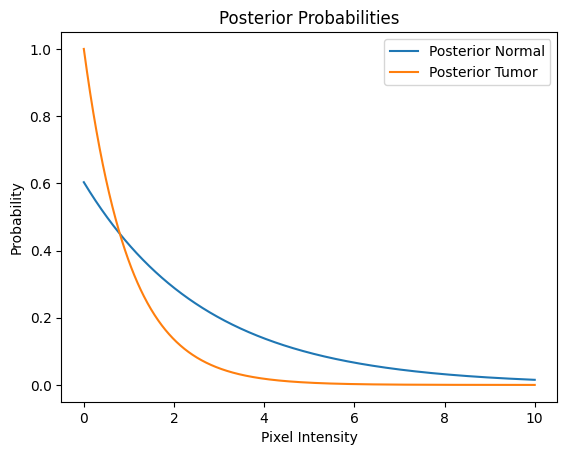

In [4]:
# Calculate posterior probabilities
posterior_normal = [normal_distribution(x) * prior_normal for x in x_values]
posterior_tumor = [tumor_distribution(x) * prior_tumor for x in x_values]

# Plot posterior probabilities
plt.plot(x_values, posterior_normal, label='Posterior Normal')
plt.plot(x_values, posterior_tumor, label='Posterior Tumor')
plt.xlabel('Pixel Intensity')
plt.ylabel('Probability')
plt.legend()
plt.title('Posterior Probabilities')
plt.show()


# Question 1 - E
Misclassification with 90% rejection region threshold

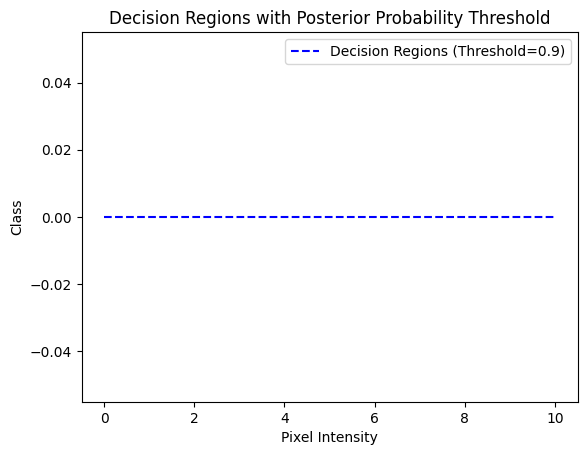

In [5]:
# Set threshold for posterior probabilities
threshold = 0.9 # 90% rejection region threshold

# Updated classification rule with threshold
def threshold_classification_rule(x):
    posterior_normal = normal_distribution(x) * prior_normal
    posterior_tumor = tumor_distribution(x) * prior_tumor
    return 1 if posterior_tumor > threshold * (posterior_tumor + posterior_normal) else 0

# Plot decision regions with threshold
decision_regions_threshold = [threshold_classification_rule(x) for x in x_values]
plt.plot(x_values, decision_regions_threshold, label=f'Decision Regions (Threshold={threshold})', color='b', linestyle='--')
plt.xlabel('Pixel Intensity')
plt.ylabel('Class')
plt.legend()
plt.title('Decision Regions with Posterior Probability Threshold')
plt.show()


# Question 1 - F
The shift in the decision region towards higher pixel intensities (toward the tumor distribution) is due to the fact that the cost of misclassifying a tumor pixel as normal is significantly higher than the cost of misclassifying a normal pixel as a tumor. By adjusting the decision boundary, we minimize the expected risk, considering the misclassification costs.

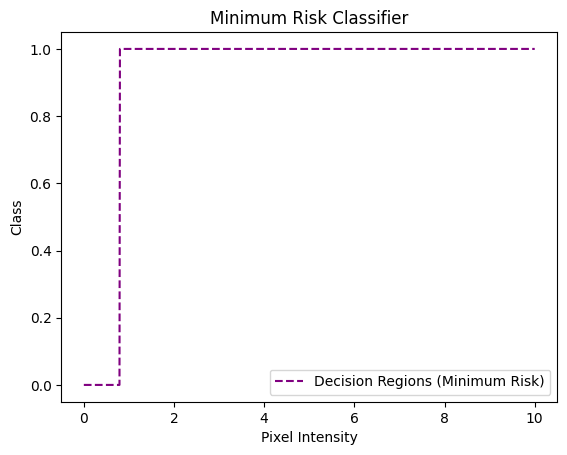

In [6]:
# Define misclassification costs
cost_normal_as_tumor = 1
cost_tumor_as_normal = np.exp(5)
cost_tumor_as_normal = int(cost_tumor_as_normal)

# Calculate expected risks
risk_normal = cost_normal_as_tumor * posterior_normal
risk_tumor = cost_tumor_as_normal * posterior_tumor

# Updated classification rule with minimum risk
def minimum_risk_classification_rule(x):
    return 1 if risk_tumor[x] < risk_normal[x] else 0

# Plot decision regions with minimum risk
decision_regions_minimum_risk = [minimum_risk_classification_rule(x) for x in range(len(x_values))]
plt.plot(x_values, decision_regions_minimum_risk, label='Decision Regions (Minimum Risk)', color='purple', linestyle='--')
plt.xlabel('Pixel Intensity')
plt.ylabel('Class')
plt.legend()
plt.title('Minimum Risk Classifier')
plt.show()


# Question 2 - A

In [7]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


import numpy as np
import scipy as sc
import pandas as pd

plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [12, 6]

fname = 'fishes-1.csv'
data = pd.read_csv(fname)
data.head(10)

# Exctracting the fields with Fishtype=1 (bass)
bass = data[data["Fishtype"] == 1]
basscount = bass['lightness'].count()
bassfeatures = bass.drop(columns='Fishtype')
bassfeatures = bassfeatures.to_numpy()


# Exctracting the fields with Fishtype=0 (salmon)
salmon = data[data["Fishtype"] == 0]
salmoncount = salmon['lightness'].count()
salmonfeatures = salmon.drop(columns='Fishtype')
salmonfeatures = salmonfeatures.to_numpy()

print(basscount)
print(salmoncount)

32304
18203


Text(0, 0.5, 'height')

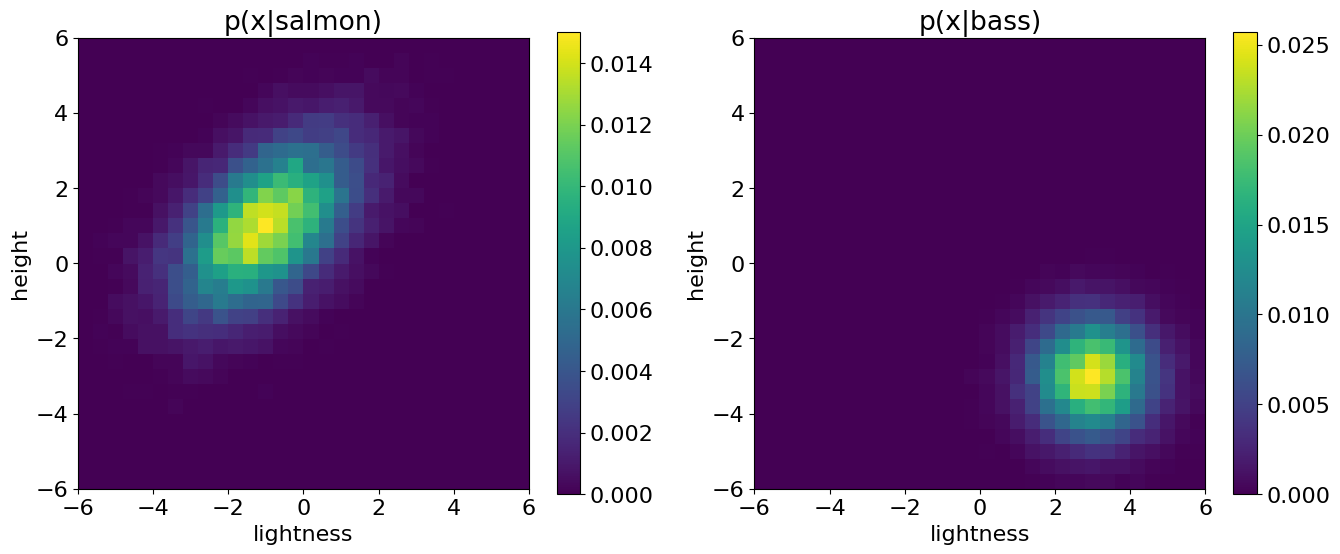

In [8]:
Nbins = 30
lbins = np.linspace(-6,6,Nbins+1)
hbins = np.linspace(-6,6,Nbins+1)

p_x_given_salmon, lbins, hbins = np.histogram2d(salmonfeatures[:,0],salmonfeatures[:,1], bins=(lbins, hbins))
p_x_given_salmon = p_x_given_salmon.T
p_x_given_salmon = p_x_given_salmon/salmoncount

fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(121, title='p(x|salmon)')
s=plt.imshow(p_x_given_salmon, interpolation='nearest', origin='lower',
       extent=[lbins[0], lbins[-1], hbins[0], hbins[-1]])
s = plt.colorbar()
plt.xlabel('lightness')
plt.ylabel('height')

p_x_given_bass, lbins, hbins = np.histogram2d(bassfeatures[:,0],bassfeatures[:,1], bins=(lbins, hbins))
p_x_given_bass = p_x_given_bass.T
p_x_given_bass = p_x_given_bass/basscount




ax = fig.add_subplot(122, title='p(x|bass)')
s=plt.imshow(p_x_given_bass, interpolation='nearest', origin='lower',
       extent=[lbins[0], lbins[-1], hbins[0], hbins[-1]])
s = plt.colorbar()
plt.xlabel('lightness')
plt.ylabel('height')


C:\Users\JORDY\AppData\Local\Temp\ipykernel_11772\1509759655.py:37: RuntimeWarning: invalid value encountered in divide
  p_salmon_given_x = p_x_given_salmon / (p_x_given_salmon + p_x_given_bass)
C:\Users\JORDY\AppData\Local\Temp\ipykernel_11772\1509759655.py:38: RuntimeWarning: invalid value encountered in divide
  p_bass_given_x = p_x_given_bass / (p_x_given_salmon + p_x_given_bass)
C:\Users\JORDY\AppData\Local\Temp\ipykernel_11772\1509759655.py:41: RuntimeWarning: invalid value encountered in divide
  p_salmon_given_bass = (p_x_given_salmon * psalmon) / ((p_x_given_salmon * psalmon) + (p_x_given_bass * pbass))
C:\Users\JORDY\AppData\Local\Temp\ipykernel_11772\1509759655.py:42: RuntimeWarning: invalid value encountered in divide
  p_bass_given_salmon = (p_x_given_bass * pbass) / (p_x_given_salmon * psalmon + p_x_given_bass * pbass)


Text(0, 0.5, 'height')

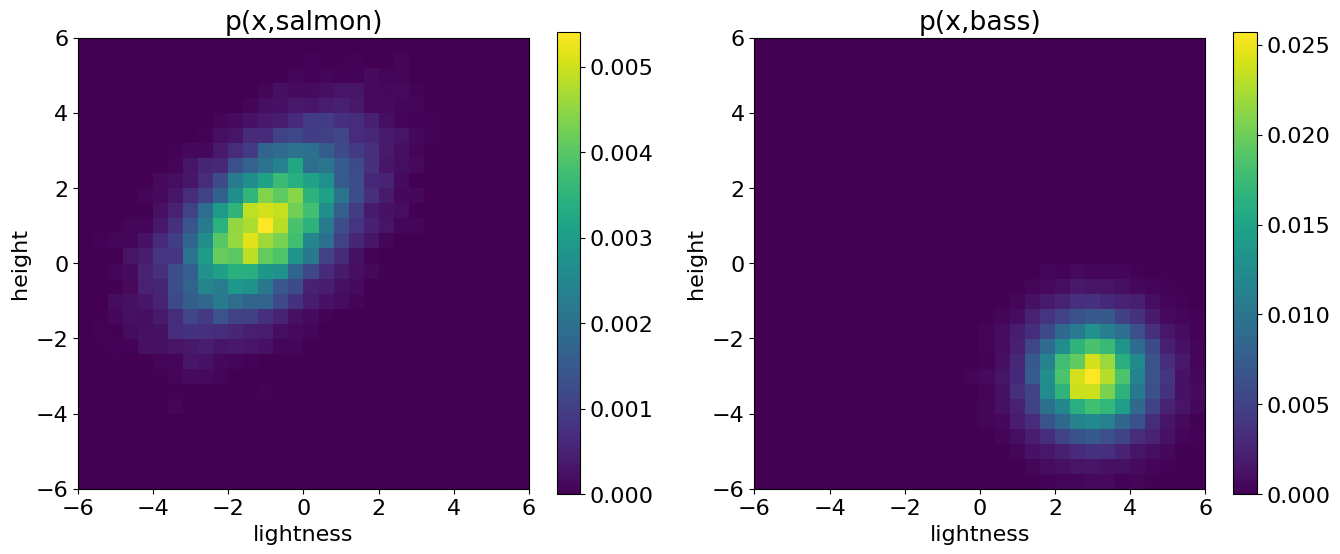

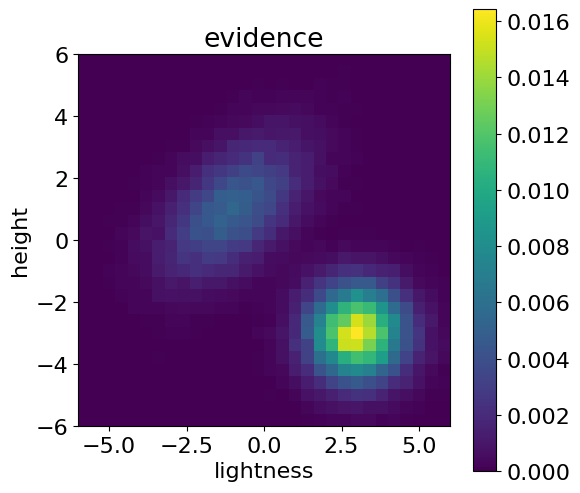

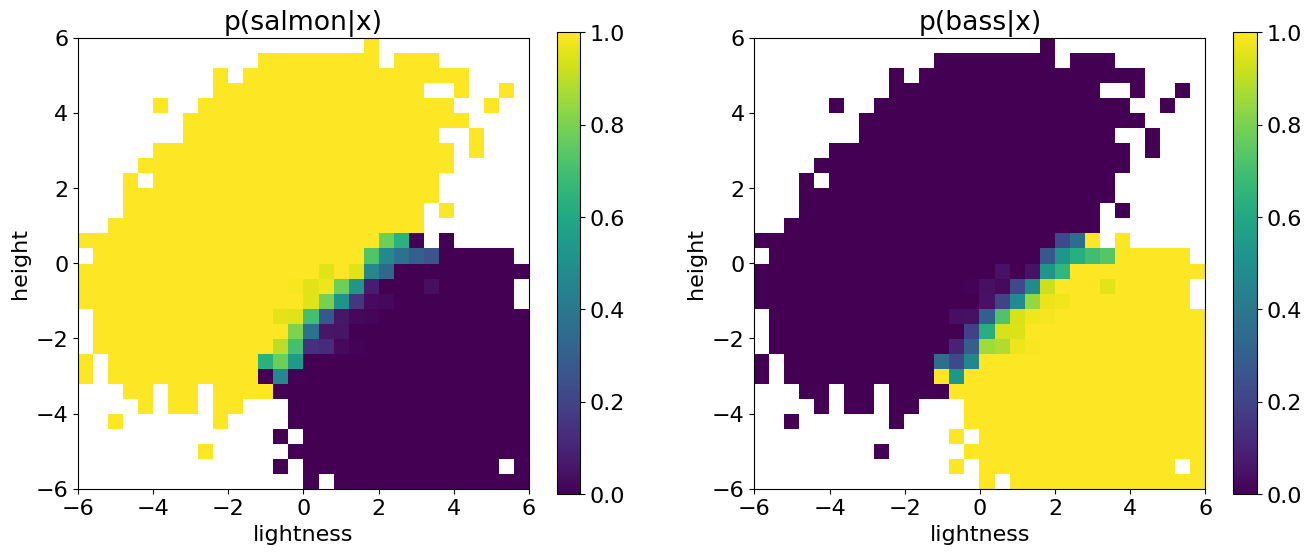

In [22]:
# Priors
pbass = (basscount/(basscount+salmoncount))
psalmon = (salmoncount/(basscount+salmoncount))

# Joint probabilities
p_x_and_salmon = (p_x_given_salmon * psalmon)
p_x_and_bass = (p_x_given_bass * pbass)

fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(121, title='p(x,salmon)')
s=plt.imshow(p_x_and_salmon, interpolation='nearest', origin='lower',
       extent=[lbins[0], lbins[-1], hbins[0], hbins[-1]])
s = plt.colorbar(ax=ax)
plt.xlabel('lightness')
plt.ylabel('height')

ax = fig.add_subplot(122, title='p(x,bass)')
s=plt.imshow(p_x_given_bass, interpolation='nearest', origin='lower',
       extent=[lbins[0], lbins[-1], hbins[0], hbins[-1]])
s = plt.colorbar(ax=ax)
plt.xlabel('lightness')
plt.ylabel('height')

# Evidence
p_x = p_x_and_salmon + p_x_and_bass

#p_x = p_x + 1e-6*(p_x<1e-6)
fig = plt.figure(figsize=(6, 6))
s=plt.imshow(p_x, interpolation='nearest', origin='lower',
       extent=[lbins[0], lbins[-1], hbins[0], hbins[-1]])
s = plt.colorbar()
s=plt.xlabel('lightness')
s=plt.ylabel('height')
s= plt.title('evidence')

# posterior probabilities
p_salmon_given_x = p_x_given_salmon / (p_x_given_salmon + p_x_given_bass)
p_bass_given_x = p_x_given_bass / (p_x_given_salmon + p_x_given_bass)

# Conditional probabilities
p_salmon_given_bass = (p_x_given_salmon * psalmon) / ((p_x_given_salmon * psalmon) + (p_x_given_bass * pbass))
p_bass_given_salmon = (p_x_given_bass * pbass) / (p_x_given_salmon * psalmon + p_x_given_bass * pbass)


fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(121, title='p(salmon|x)')
s=plt.imshow(p_salmon_given_x, interpolation='nearest', origin='lower',
       extent=[lbins[0], lbins[-1], hbins[0], hbins[-1]])
s = plt.colorbar(ax=ax)
plt.xlabel('lightness')
plt.ylabel('height')

ax = fig.add_subplot(122, title='p(bass|x)')
s=plt.imshow(p_bass_given_x, interpolation='nearest', origin='lower',
       extent=[lbins[0], lbins[-1], hbins[0], hbins[-1]])
s = plt.colorbar(ax=ax)
plt.xlabel('lightness')
plt.ylabel('height')



# Question 2 - B

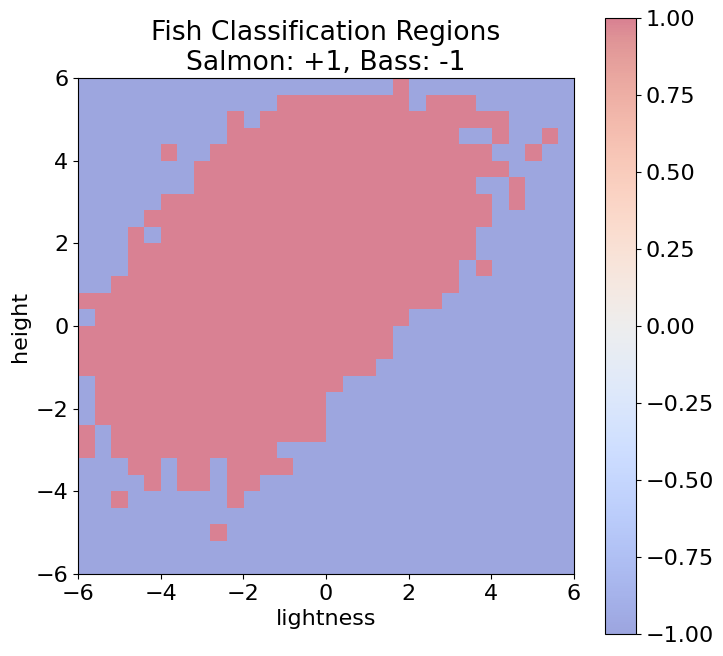

In [14]:
fish_classification = np.where(p_salmon_given_x > p_bass_given_x, 1, -1)

# Plot decision regions
fig = plt.figure(figsize=(8, 8))
s = plt.imshow(fish_classification, interpolation='nearest', origin='lower',
               extent=[lbins[0], lbins[-1], hbins[0], hbins[-1]], cmap='coolwarm', alpha=0.5)
s = plt.colorbar()
plt.xlabel('lightness')
plt.ylabel('height')
plt.title('Fish Classification Regions\nSalmon: +1, Bass: -1')
plt.show()

# Question 2 - C

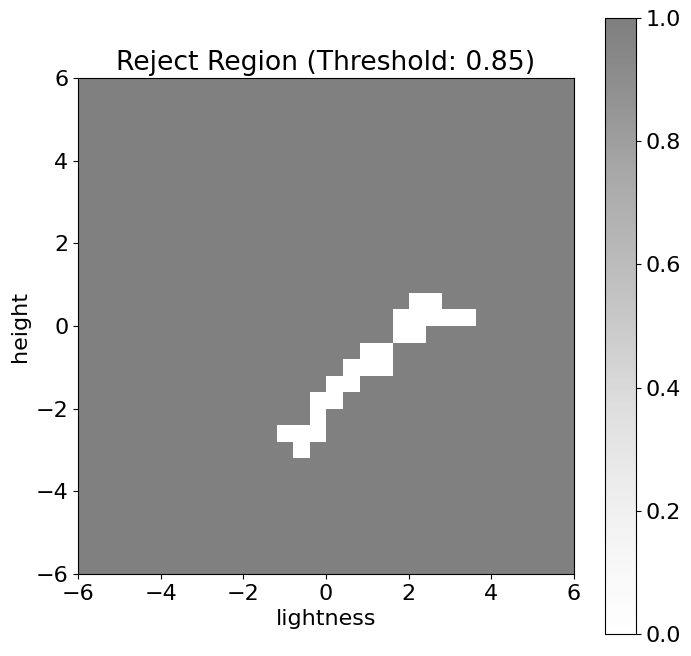

In [16]:
reject_region = np.where(np.maximum(p_salmon_given_x, p_bass_given_x) < 0.85, 0, 1)

# Plot reject region
fig = plt.figure(figsize=(8, 8))
s = plt.imshow(reject_region, interpolation='nearest', origin='lower',
               extent=[lbins[0], lbins[-1], hbins[0], hbins[-1]], cmap='Greys', alpha=0.5)
s = plt.colorbar()
plt.xlabel('lightness')
plt.ylabel('height')
plt.title('Reject Region (Threshold: 0.85)')
plt.show()


# Question 2 - D

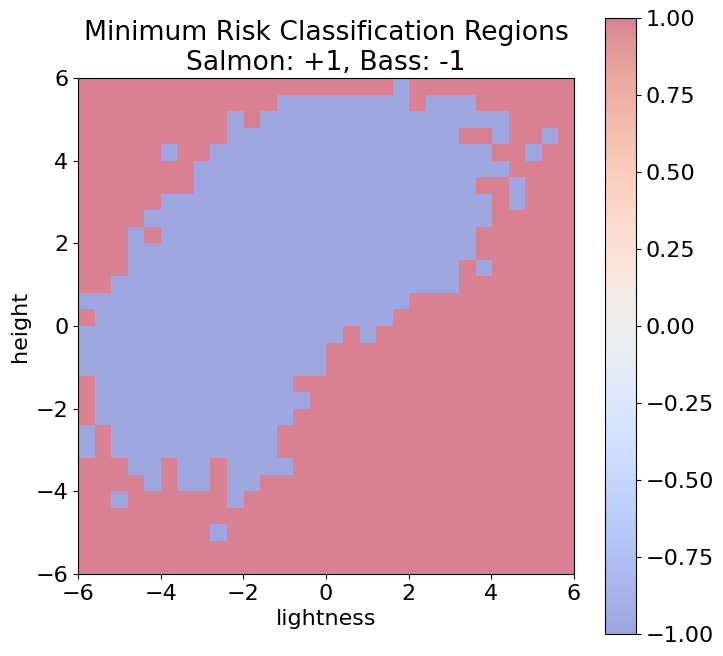

In [24]:
risk_table = np.array([[0, 30], [1, 0]])

cost_bass_given_salmon = risk_table[0, 1] * p_bass_given_salmon
cost_salmon_given_bass = risk_table[1, 0] * p_salmon_given_bass

min_risk_classification = np.where(cost_bass_given_salmon < cost_salmon_given_bass, -1, 1)

# Plot minimum risk classification regions
fig = plt.figure(figsize=(8, 8))
s = plt.imshow(min_risk_classification, interpolation='nearest', origin='lower',
               extent=[lbins[0], lbins[-1], hbins[0], hbins[-1]], cmap='coolwarm', alpha=0.5)
s = plt.colorbar()
plt.xlabel('lightness')
plt.ylabel('height')
plt.title('Minimum Risk Classification Regions\nSalmon: +1, Bass: -1')
plt.show()

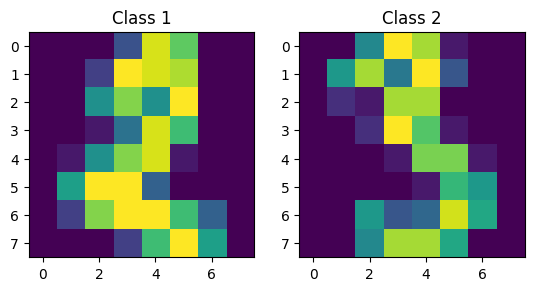

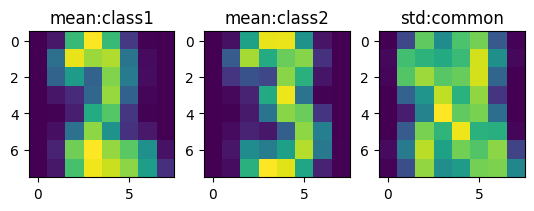

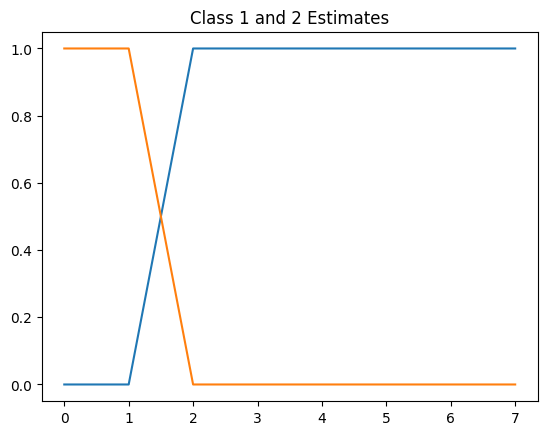

class1 misclassifications =  1
class2 misclassifications =  1
Total misclassifications =  2


In [188]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

mnist = load_digits(n_class=9)
#print(mnist.keys())


# Change the line below to set the classes

# Try first with zeros and ones
# Change later to 2 and 3

zeros = (mnist.target==2)
ones = (mnist.target==3)

class1_images = mnist.images[zeros]
class2_images = mnist.images[ones]
fig,ax = plt.subplots(1,2)
s=ax[0].imshow(class1_images[0])
s=ax[0].set_title('Class 1')
s=ax[1].imshow(class2_images[0])
s=ax[1].set_title('Class 2')
# Compute the means
mu1 = np.mean(class1_images,axis=0)
mu2 = np.mean(class2_images,axis=0)

# Create mean subtracted images
class1_demeaned = class1_images - mu1[None,]
class2_demeaned = class2_images - mu2[None,]

# Compute the combined covariance matrix, assuming it to be diagonal

class_combined_demeaned = np.concatenate((class1_demeaned,class2_demeaned),axis=0)
std = np.std(class_combined_demeaned,axis=0)

fig,ax = plt.subplots(1,3)
s=ax[0].imshow(mu1)
s=ax[0].set_title('mean:class1')
s=ax[1].imshow(mu2)
s=ax[1].set_title('mean:class2')

s=ax[2].imshow(std)
s=ax[2].set_title('std:common')

x = np.concatenate((class1_images,class2_images),axis=0)
class1_labels = np.full(x.shape[0], 2)
class1_labels[0:class1_images.shape[0]]=2
label1 = class1_labels[0:class1_images.shape[0]]
class1_labels[class1_images.shape[0]:]=3
label2 = class1_labels[class1_images.shape[0]:]
# Your code here
cov = np.eye(class_combined_demeaned.shape[1]) # Single row covariance matrix

cov_matrix_inv = np.linalg.inv(cov)
# Calculate Mahalanobis distance (Euclidean distance in this case)
mahalanobis_class1 = np.linalg.norm(x - mu1[None, :], axis=1)
mahalanobis_class2 = np.linalg.norm(x - mu2[None, :], axis=1)

mahalanobis_class1 = np.sqrt(cov_matrix_inv @ mahalanobis_class1[1])
mahalanobis_class2 = np.sqrt(cov_matrix_inv @ mahalanobis_class2[1])

# change the line below
class1_estimate = np.less(mahalanobis_class1, mahalanobis_class2)
class2_estimate = np.less(mahalanobis_class2 , mahalanobis_class1)

# shape data for print
#class1_labels_reshaped = class1_labels.reshape(8,360)
fig,ax = plt.subplots(1,1)

plt.plot(class1_estimate)
plt.plot(class2_estimate)
plt.title('Class 1 and 2 Estimates')
plt.show()
class1 = class1_estimate.reshape(-1,1)
label1 = label1.reshape(-1,1)
label1 = label1.reshape(-1,1)
misclass1 = np.sum(class1[1] != label1[1])
misclass2 = np.sum(class2_estimate[1] != label2[1])

print("class1 misclassifications = ",misclass1)
print("class2 misclassifications = ",misclass2)
print('Total misclassifications = ', misclass1+misclass2)

